In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb

In [2]:
df = pd.read_csv('./game_result/merged_FBREF.csv')

In [3]:
df.head()

,Date,Team,Opponent,Referee,TY,OY,TR,OR,B365TW,B365D,...,Clean Sheet,Pass Completion %,Assists,Exp. Assisted Goals,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error
0,2018-08-10,Leicester City,Manchester Utd,A Marriner,1,2,0,0,7.50,3.9,...,0,79.4,0,0.8,1.0,11,21.4,8,12,0
1,2018-08-10,Manchester Utd,Leicester City,A Marriner,2,1,0,0,1.57,3.9,...,0,80.1,1,0.7,0.3,13,50.0,15,17,0
2,2018-08-11,Bournemouth,Cardiff City,K Friend,1,1,0,0,1.90,3.6,...,1,79.0,2,1.3,1.1,5,47.1,11,4,0
3,2018-08-11,Brighton & Hove Albion,Watford,J Moss,2,2,0,0,3.40,3.2,...,0,74.4,0,0.3,0.2,11,50.0,14,17,0
4,2018-08-11,Cardiff City,Bournemouth,K Friend,1,1,0,0,4.50,3.6,...,0,58.4,0,1.5,1.2,12,47.6,16,15,0


In [4]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Referee', 'TY', 'OY', 'TR', 'OR', 'B365TW',
       'B365D', 'B365OW', 'Season', 'Time', 'Round', 'Round.1', 'Table', 'Day',
       'Venue', 'Result', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
       'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error'],
      dtype='object')

In [5]:
df.isnull().sum()

Date                      0
Team                      0
Opponent                  0
Referee                   0
TY                        0
OY                        0
TR                        0
OR                        0
B365TW                    0
B365D                     0
B365OW                    0
Season                    0
Time                      0
Round                     0
Round.1                   0
Table                     0
Day                       0
Venue                     0
Result                    0
Possesion                 0
Aerial Duels(%)           0
GF                        0
GA                        0
Oppo. Table               0
Shot on Target            0
Shot on Target(%)         2
Goals per Shot            2
Expected Goals            0
Save%                     0
Clean Sheet               0
Pass Completion %         0
Assists                   0
Exp. Assisted Goals       0
Expected Assists          0
Tackles Won               0
% of Dribblers Tackl

In [6]:
df[df['Shot on Target(%)'].isnull()].T

,559,1606
Date,2019-03-02,2020-10-18
Team,Bournemouth,Crystal Palace
Opponent,Manchester City,Brighton & Hove Albion
Referee,K Friend,S Attwell
TY,1,3
OY,2,2
TR,0,0
OR,0,1
B365TW,13.0,2.62
B365D,7.5,3.3


In [7]:
# 위의 null은 슈팅 자체가 0개여서 생김 -> 그러므로 0으로 대체함

In [8]:
df = df.fillna(0)

In [9]:
df.isnull().sum()

Date                      0
Team                      0
Opponent                  0
Referee                   0
TY                        0
OY                        0
TR                        0
OR                        0
B365TW                    0
B365D                     0
B365OW                    0
Season                    0
Time                      0
Round                     0
Round.1                   0
Table                     0
Day                       0
Venue                     0
Result                    0
Possesion                 0
Aerial Duels(%)           0
GF                        0
GA                        0
Oppo. Table               0
Shot on Target            0
Shot on Target(%)         0
Goals per Shot            0
Expected Goals            0
Save%                     0
Clean Sheet               0
Pass Completion %         0
Assists                   0
Exp. Assisted Goals       0
Expected Assists          0
Tackles Won               0
% of Dribblers Tackl

In [10]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Referee', 'TY', 'OY', 'TR', 'OR', 'B365TW',
       'B365D', 'B365OW', 'Season', 'Time', 'Round', 'Round.1', 'Table', 'Day',
       'Venue', 'Result', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
       'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error'],
      dtype='object')

In [11]:
# 지금 이 데이터셋에는 감독이 없는데 club_games 데이터셋의 감독을 넣어서 모델링 하자 

In [12]:
club_games_df = pd.read_csv('./data/club_games.csv')

In [13]:
club_games_df

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
3,2321044,16,2,1.0,Jürgen Klopp,23,1,15.0,Torsten Lieberknecht,Home,1
4,2321060,23,0,18.0,Torsten Lieberknecht,24,2,11.0,Armin Veh,Home,0
...,...,...,...,...,...,...,...,...,...,...,...
134837,3142950,681,0,NaN,Imanol Alguacil,150,0,NaN,Quique Setién,Away,0
134838,3148382,150,1,NaN,Quique Setién,714,1,NaN,Rubi,Away,0
134839,3153158,418,1,NaN,Santiago Solari,131,1,NaN,Ernesto Valverde,Away,0
134840,3307741,36661,1,NaN,Aleksandr Gorshkov,32218,2,NaN,Viktor Antikhovich,Away,0


In [14]:
club_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134842 entries, 0 to 134841
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_id                134842 non-null  int64  
 1   club_id                134842 non-null  int64  
 2   own_goals              134842 non-null  int64  
 3   own_position           94898 non-null   float64
 4   own_manager_name       133350 non-null  object 
 5   opponent_id            134842 non-null  int64  
 6   opponent_goals         134842 non-null  int64  
 7   opponent_position      94898 non-null   float64
 8   opponent_manager_name  133350 non-null  object 
 9   hosting                134842 non-null  object 
 10  is_win                 134842 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 11.3+ MB


In [15]:
games_df = pd.read_csv('./data/games.csv')

In [16]:
games_df

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67416,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,...,Philips Stadion,31000.0,Allard Lindhout,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Attacking,4-4-2,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,6:0,domestic_cup
67417,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,...,Philips Stadion,34200.0,Anthony Taylor,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Defending,4-5-1,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup
67418,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,...,bet365 Stadium,9410.0,Michael Salisbury,https://www.transfermarkt.co.uk/spielbericht/i...,Starting Line-up: 4-2-3-1,Starting Line-up: 4-2-3-1,Stoke City,NaN,6:1,other
67419,3143618,FAC,2018,Third Round Replay,2019-01-15,512,3054,2,3,NaN,...,bet365 Stadium,10261.0,Geoff Eltringham,https://www.transfermarkt.co.uk/spielbericht/i...,4-4-2 Diamond,4-2-3-1,Stoke City,NaN,2:3,domestic_cup


In [17]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67421 entries, 0 to 67420
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 67421 non-null  int64  
 1   competition_id          67421 non-null  object 
 2   season                  67421 non-null  int64  
 3   round                   67421 non-null  object 
 4   date                    67421 non-null  object 
 5   home_club_id            67421 non-null  int64  
 6   away_club_id            67421 non-null  int64  
 7   home_club_goals         67421 non-null  int64  
 8   away_club_goals         67421 non-null  int64  
 9   home_club_position      47449 non-null  float64
 10  away_club_position      47449 non-null  float64
 11  home_club_manager_name  66675 non-null  object 
 12  away_club_manager_name  66675 non-null  object 
 13  stadium                 67207 non-null  object 
 14  attendance              57718 non-null

In [18]:
games_df = games_df[games_df['competition_id'] == 'GB1']

In [19]:
games_df

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
24,2332021,GB1,2013,17. Matchday,2013-12-21,984,3008,1,1,16.0,...,The Hawthorns,24753.0,Jonathan Moss,https://www.transfermarkt.co.uk/west-bromwich-...,4-2-3-1,5-3-2,West Bromwich Albion,Hull City,1:1,domestic_league
25,2332050,GB1,2013,14. Matchday,2013-12-04,289,631,3,4,20.0,...,Stadium of Light,40652.0,Phil Dowd,https://www.transfermarkt.co.uk/sunderland-afc...,4-1-4-1,4-2-3-1,Sunderland AFC,Chelsea Football Club,3:4,domestic_league
26,2332053,GB1,2013,13. Matchday,2013-11-30,379,931,3,0,15.0,...,Boleyn Ground,34946.0,Martin Atkinson,https://www.transfermarkt.co.uk/west-ham-unite...,4-2-3-1,4-4-1-1,West Ham United Football Club,Fulham Football Club,3:0,domestic_league
27,2332188,GB1,2013,23. Matchday,2014-01-28,180,11,2,2,9.0,...,St Mary's Stadium,31284.0,Lee Mason,https://www.transfermarkt.co.uk/southampton-fc...,4-2-3-1,4-2-3-1,Southampton FC,Arsenal Football Club,2:2,domestic_league
28,2332235,GB1,2013,23. Matchday,2014-01-28,873,3008,1,0,14.0,...,Selhurst Park,22519.0,Roger East,https://www.transfermarkt.co.uk/crystal-palace...,4-4-2 double 6,3-5-2 flat,Crystal Palace Football Club,Hull City,1:0,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67061,2258968,GB1,2012,21. Matchday,2013-01-01,281,512,3,0,2.0,...,Etihad Stadium,47192.0,Michael Oliver,https://www.transfermarkt.co.uk/manchester-cit...,NaN,NaN,Manchester City Football Club,Stoke City,3:0,domestic_league
67152,3429694,GB1,2020,21. Matchday,2021-01-31,1237,148,1,0,17.0,...,AMEX Stadium,NaN,Peter Bankes,https://www.transfermarkt.co.uk/brighton-amp-h...,3-4-2-1,3-4-2-1,Brighton and Hove Albion Football Club,Tottenham Hotspur Football Club,1:0,domestic_league
67160,3592240,GB1,2021,37. Matchday,2022-05-15,148,1132,1,0,4.0,...,Tottenham Hotspur Stadium,61729.0,Kevin Friend,https://www.transfermarkt.co.uk/tottenham-hots...,5-4-1,5-3-2,Tottenham Hotspur Football Club,Burnley Football Club,1:0,domestic_league
67291,2872297,GB1,2017,19. Matchday,2017-12-23,1132,148,0,3,7.0,...,Turf Moor,21650.0,Michael Oliver,https://www.transfermarkt.co.uk/burnley-fc_tot...,4-2-3-1,4-2-3-1,Burnley Football Club,Tottenham Hotspur Football Club,0:3,domestic_league


In [20]:
games_df['date'] = pd.to_datetime(games_df['date'])

In [21]:
games_df = games_df[games_df['date'] >= '2018-08-01']

In [22]:
games_df

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
1876,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,John Smith's Stadium,24121.0,Chris Kavanagh,https://www.transfermarkt.co.uk/huddersfield-t...,3-5-2 flat,4-3-3 Attacking,Huddersfield Town,Chelsea Football Club,0:3,domestic_league
1877,3050215,GB1,2018,5. Matchday,2018-09-15,1010,985,1,2,4.0,...,Vicarage Road,20537.0,Mike Dean,https://www.transfermarkt.co.uk/watford-fc_man...,4-4-2,4-2-3-1,Watford FC,Manchester United Football Club,1:2,domestic_league
1878,3050250,GB1,2018,9. Matchday,2018-10-20,631,985,2,2,3.0,...,Stamford Bridge,40721.0,Mike Dean,https://www.transfermarkt.co.uk/chelsea-fc_man...,4-3-3 Attacking,4-3-3 Attacking,Chelsea Football Club,Manchester United Football Club,2:2,domestic_league
1879,3050264,GB1,2018,10. Matchday,2018-10-27,180,762,0,0,16.0,...,St Mary's Stadium,30736.0,Chris Kavanagh,https://www.transfermarkt.co.uk/southampton-fc...,4-4-2 double 6,4-4-2 double 6,Southampton FC,Newcastle United Football Club,0:0,domestic_league
1880,3050336,GB1,2018,17. Matchday,2018-12-15,543,989,2,0,7.0,...,Molineux Stadium,30997.0,Simon Hooper,https://www.transfermarkt.co.uk/wolverhampton-...,3-5-2,3-4-2-1,Wolverhampton Wanderers Football Club,Association Football Club Bournemouth,2:0,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66901,3050278,GB1,2018,12. Matchday,2018-11-10,603,1237,2,1,18.0,...,Cardiff City Stadium,29402.0,Martin Atkinson,https://www.transfermarkt.co.uk/cardiff-city_b...,4-3-3 Attacking,4-2-3-1,Cardiff City,Brighton and Hove Albion Football Club,2:1,domestic_league
66913,3421741,GB1,2020,7. Matchday,2020-11-01,148,1237,2,1,3.0,...,Tottenham Hotspur Stadium,NaN,Graham Scott,https://www.transfermarkt.co.uk/tottenham-hots...,4-2-3-1,3-5-2 flat,Tottenham Hotspur Football Club,Brighton and Hove Albion Football Club,2:1,domestic_league
66914,3429714,GB1,2020,23. Matchday,2021-02-06,1132,1237,1,1,17.0,...,Turf Moor,NaN,Anthony Taylor,https://www.transfermarkt.co.uk/burnley-fc_bri...,4-4-2 double 6,5-3-2,Burnley Football Club,Brighton and Hove Albion Football Club,1:1,domestic_league
67152,3429694,GB1,2020,21. Matchday,2021-01-31,1237,148,1,0,17.0,...,AMEX Stadium,NaN,Peter Bankes,https://www.transfermarkt.co.uk/brighton-amp-h...,3-4-2-1,3-4-2-1,Brighton and Hove Albion Football Club,Tottenham Hotspur Football Club,1:0,domestic_league


In [23]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 1876 to 67160
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 2183 non-null   int64         
 1   competition_id          2183 non-null   object        
 2   season                  2183 non-null   int64         
 3   round                   2183 non-null   object        
 4   date                    2183 non-null   datetime64[ns]
 5   home_club_id            2183 non-null   int64         
 6   away_club_id            2183 non-null   int64         
 7   home_club_goals         2183 non-null   int64         
 8   away_club_goals         2183 non-null   int64         
 9   home_club_position      2183 non-null   float64       
 10  away_club_position      2183 non-null   float64       
 11  home_club_manager_name  2183 non-null   object        
 12  away_club_manager_name  2183 non-null   object   

In [24]:
games_df.isnull().sum()

game_id                     0
competition_id              0
season                      0
round                       0
date                        0
home_club_id                0
away_club_id                0
home_club_goals             0
away_club_goals             0
home_club_position          0
away_club_position          0
home_club_manager_name      0
away_club_manager_name      0
stadium                     0
attendance                455
referee                     0
url                         0
home_club_formation         0
away_club_formation         0
home_club_name              0
away_club_name              0
aggregate                   0
competition_type            0
dtype: int64

In [25]:
club_games_df = club_games_df[club_games_df['game_id'].isin(games_df['game_id'])]

In [26]:
club_games_df

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
2097,3050170,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,0
2098,3050190,1110,0,19.0,David Wagner,603,0,15.0,Neil Warnock,Home,0
2099,3050199,603,2,16.0,Neil Warnock,11,3,9.0,Unai Emery,Home,0
2100,3050215,1010,1,4.0,Javi Gracia,985,2,8.0,José Mourinho,Home,0
2101,3050250,631,2,3.0,Maurizio Sarri,985,2,10.0,José Mourinho,Home,0
...,...,...,...,...,...,...,...,...,...,...,...
134815,3429732,350,0,20.0,Chris Wilder,379,3,5.0,David Moyes,Away,0
134816,3429776,399,2,11.0,Marcelo Bielsa,931,1,18.0,Scott Parker,Away,1
134818,3592178,31,2,2.0,Jürgen Klopp,405,1,15.0,Steven Gerrard,Away,1
134821,4095319,1148,2,14.0,Thomas Frank,543,0,11.0,Gary O'Neil,Away,1


In [27]:
merged_df1 = pd.merge(games_df[['game_id', 'date']], club_games_df, on='game_id', how='right')

In [28]:
merged_df1.sort_values('game_id')

,game_id,date,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
917,3050167,2018-08-12,11,0,15.0,Unai Emery,281,2,3.0,Pep Guardiola,Home,0
3100,3050167,2018-08-12,281,2,3.0,Pep Guardiola,11,0,15.0,Unai Emery,Away,1
4192,3050168,2018-08-11,603,0,17.0,Neil Warnock,989,2,5.0,Eddie Howe,Away,0
2009,3050168,2018-08-11,989,2,5.0,Eddie Howe,603,0,17.0,Neil Warnock,Home,1
918,3050169,2018-08-11,931,0,18.0,Slavisa Jokanovic,873,2,4.0,Roy Hodgson,Home,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,4095365,2024-03-16,931,3,12.0,Marco Silva,148,0,5.0,Ange Postecoglou,Home,1
225,4095366,2024-03-16,1031,1,17.0,Rob Edwards,703,1,18.0,Nuno Espírito Santo,Home,0
2408,4095366,2024-03-16,703,1,18.0,Nuno Espírito Santo,1031,1,17.0,Rob Edwards,Away,0
4187,4095368,2024-03-17,405,1,4.0,Unai Emery,379,1,7.0,David Moyes,Away,0


In [29]:
merged_home_df = merged_df1[merged_df1['hosting'] == 'Home']

In [30]:
merged_away_df = merged_df1[merged_df1['hosting'] == 'Away']

In [31]:
home_game_df = pd.merge(merged_home_df, games_df[['game_id', 'home_club_name']], on='game_id')

In [32]:
home_game_df.sort_values('game_id')

,game_id,date,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,home_club_name
917,3050167,2018-08-12,11,0,15.0,Unai Emery,281,2,3.0,Pep Guardiola,Home,0,Arsenal Football Club
2009,3050168,2018-08-11,989,2,5.0,Eddie Howe,603,0,17.0,Neil Warnock,Home,1,Association Football Club Bournemouth
918,3050169,2018-08-11,931,0,18.0,Slavisa Jokanovic,873,2,4.0,Roy Hodgson,Home,0,Fulham Football Club
0,3050170,2018-08-11,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,0,Huddersfield Town
1323,3050171,2018-08-12,31,4,1.0,Jürgen Klopp,379,0,20.0,Manuel Pellegrini,Home,1,Liverpool Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,4095359,2024-03-09,543,2,9.0,Gary O'Neil,931,1,12.0,Marco Silva,Home,1,Wolverhampton Wanderers Football Club
1604,4095362,2024-03-16,1132,2,19.0,Vincent Kompany,1148,1,15.0,Thomas Frank,Home,1,Burnley Football Club
1156,4095365,2024-03-16,931,3,12.0,Marco Silva,148,0,5.0,Ange Postecoglou,Home,1,Fulham Football Club
225,4095366,2024-03-16,1031,1,17.0,Rob Edwards,703,1,18.0,Nuno Espírito Santo,Home,0,Luton Town Football Club


In [33]:
new_column_names = {'home_club_name': 'club_name'}
home_game_df = home_game_df.rename(columns=new_column_names)

In [34]:
away_game_df = pd.merge(merged_away_df, games_df[['game_id', 'away_club_name']], on='game_id')

In [35]:
away_game_df.sort_values('game_id')

,game_id,date,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,away_club_name
917,3050167,2018-08-12,281,2,3.0,Pep Guardiola,11,0,15.0,Unai Emery,Away,1,Manchester City Football Club
2009,3050168,2018-08-11,603,0,17.0,Neil Warnock,989,2,5.0,Eddie Howe,Away,0,Cardiff City
918,3050169,2018-08-11,873,2,4.0,Roy Hodgson,931,0,18.0,Slavisa Jokanovic,Away,1,Crystal Palace Football Club
0,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,1,Chelsea Football Club
1323,3050171,2018-08-12,379,0,20.0,Manuel Pellegrini,31,4,1.0,Jürgen Klopp,Away,0,West Ham United Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,4095359,2024-03-09,931,1,12.0,Marco Silva,543,2,9.0,Gary O'Neil,Away,0,Fulham Football Club
1604,4095362,2024-03-16,1148,1,15.0,Thomas Frank,1132,2,19.0,Vincent Kompany,Away,0,Brentford Football Club
1156,4095365,2024-03-16,148,0,5.0,Ange Postecoglou,931,3,12.0,Marco Silva,Away,0,Tottenham Hotspur Football Club
225,4095366,2024-03-16,703,1,18.0,Nuno Espírito Santo,1031,1,17.0,Rob Edwards,Away,0,Nottingham Forest Football Club


In [36]:
new_column_names = {'away_club_name': 'club_name'}
away_game_df = away_game_df.rename(columns=new_column_names)

In [37]:
m_merged_df = pd.concat([home_game_df, away_game_df], axis=0).sort_values('game_id')

In [38]:
m_merged_df

,game_id,date,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,club_name
917,3050167,2018-08-12,11,0,15.0,Unai Emery,281,2,3.0,Pep Guardiola,Home,0,Arsenal Football Club
917,3050167,2018-08-12,281,2,3.0,Pep Guardiola,11,0,15.0,Unai Emery,Away,1,Manchester City Football Club
2009,3050168,2018-08-11,603,0,17.0,Neil Warnock,989,2,5.0,Eddie Howe,Away,0,Cardiff City
2009,3050168,2018-08-11,989,2,5.0,Eddie Howe,603,0,17.0,Neil Warnock,Home,1,Association Football Club Bournemouth
918,3050169,2018-08-11,931,0,18.0,Slavisa Jokanovic,873,2,4.0,Roy Hodgson,Home,0,Fulham Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,4095365,2024-03-16,931,3,12.0,Marco Silva,148,0,5.0,Ange Postecoglou,Home,1,Fulham Football Club
225,4095366,2024-03-16,1031,1,17.0,Rob Edwards,703,1,18.0,Nuno Espírito Santo,Home,0,Luton Town Football Club
225,4095366,2024-03-16,703,1,18.0,Nuno Espírito Santo,1031,1,17.0,Rob Edwards,Away,0,Nottingham Forest Football Club
2004,4095368,2024-03-17,405,1,4.0,Unai Emery,379,1,7.0,David Moyes,Away,0,Aston Villa Football Club


In [39]:
# 'Referee'를 drop시킨 이유는 경기일 이전에 알기 힘든 정보라서 제외
# 나중에 만약 경기일 3일 이전에 알 수 있다면 추후에 넣는 것으로 하자

In [40]:
dropped_df = df.drop(['Season', 'Time', 'Round', 'Round.1', 'Day', 'Referee'], axis=1)

In [41]:
dropped_df.columns

Index(['Date', 'Team', 'Opponent', 'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Venue', 'Result', 'Possesion', 'Aerial Duels(%)',
       'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error'],
      dtype='object')

In [42]:
# df 와 merge하기 위해서 club이름을 다시 설정

In [43]:
name_mapping = {
    'Arsenal Football Club': 'Arsenal', 
    'Manchester City Football Club': 'Manchester City',
    'Cardiff City': 'Cardiff City', 
    'Association Football Club Bournemouth': 'Bournemouth',
    'Fulham Football Club': 'Fulham', 
    'Crystal Palace Football Club': 'Crystal Palace',
    'Huddersfield Town': 'Huddersfield', 
    'Chelsea Football Club': 'Chelsea',
    'West Ham United Football Club': 'West Ham', 
    'Liverpool Football Club': 'Liverpool',
    'Manchester United Football Club': 'Manchester Utd', 
    'Leicester City': 'Leicester City',
    'Newcastle United Football Club': 'Newcastle Utd',
    'Tottenham Hotspur Football Club': 'Tottenham', 
    'Burnley Football Club': 'Burnley',
    'Southampton FC': 'Southampton', 
    'Watford FC': 'Watford',
    'Brighton and Hove Albion Football Club': 'Brighton & Hove Albion',
    'Wolverhampton Wanderers Football Club': 'Wolverhampton', 
    'Everton Football Club': 'Everton',
    'Norwich City': 'Norwich City', 
    'Sheffield United Football Club': 'Sheffield Utd',
    'Aston Villa Football Club': 'Aston Villa', 
    'Leeds United': 'Leeds United',
    'West Bromwich Albion': 'West Bromwich Albion', 
    'Brentford Football Club': 'Brentford',
    'Nottingham Forest Football Club': 'Nottingham Forest', 
    'Luton Town Football Club': 'Luton Town'
}

In [44]:
m_merged_df['club_name'] = m_merged_df['club_name'].replace(name_mapping)

In [45]:
m_merged_df

,game_id,date,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,club_name
917,3050167,2018-08-12,11,0,15.0,Unai Emery,281,2,3.0,Pep Guardiola,Home,0,Arsenal
917,3050167,2018-08-12,281,2,3.0,Pep Guardiola,11,0,15.0,Unai Emery,Away,1,Manchester City
2009,3050168,2018-08-11,603,0,17.0,Neil Warnock,989,2,5.0,Eddie Howe,Away,0,Cardiff City
2009,3050168,2018-08-11,989,2,5.0,Eddie Howe,603,0,17.0,Neil Warnock,Home,1,Bournemouth
918,3050169,2018-08-11,931,0,18.0,Slavisa Jokanovic,873,2,4.0,Roy Hodgson,Home,0,Fulham
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,4095365,2024-03-16,931,3,12.0,Marco Silva,148,0,5.0,Ange Postecoglou,Home,1,Fulham
225,4095366,2024-03-16,1031,1,17.0,Rob Edwards,703,1,18.0,Nuno Espírito Santo,Home,0,Luton Town
225,4095366,2024-03-16,703,1,18.0,Nuno Espírito Santo,1031,1,17.0,Rob Edwards,Away,0,Nottingham Forest
2004,4095368,2024-03-17,405,1,4.0,Unai Emery,379,1,7.0,David Moyes,Away,0,Aston Villa


In [46]:
# 내가 지금까지 club_games랑 games df를 전처리한 건 df DataFrame에 감독이름을 추가하기 위해서

In [47]:
# 다음은 df dataframe 정리하기

In [48]:
# 배팅 정보는 확률로 변경

In [49]:
dropped_df['B365TW'] = (1/dropped_df['B365TW'])*100

In [50]:
dropped_df['B365D'] = (1/dropped_df['B365D'])*100

In [51]:
dropped_df['B365OW'] = (1/dropped_df['B365OW'])*100

In [52]:
dropped_df.columns

Index(['Date', 'Team', 'Opponent', 'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Venue', 'Result', 'Possesion', 'Aerial Duels(%)',
       'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error'],
      dtype='object')

In [53]:
dropped_df.head()

,Date,Team,Opponent,TY,OY,TR,OR,B365TW,B365D,B365OW,...,Clean Sheet,Pass Completion %,Assists,Exp. Assisted Goals,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error
0,2018-08-10,Leicester City,Manchester Utd,1,2,0,0,13.333333,25.641026,63.694268,...,0,79.4,0,0.8,1.0,11,21.4,8,12,0
1,2018-08-10,Manchester Utd,Leicester City,2,1,0,0,63.694268,25.641026,13.333333,...,0,80.1,1,0.7,0.3,13,50.0,15,17,0
2,2018-08-11,Bournemouth,Cardiff City,1,1,0,0,52.631579,27.777778,22.222222,...,1,79.0,2,1.3,1.1,5,47.1,11,4,0
3,2018-08-11,Brighton & Hove Albion,Watford,2,2,0,0,29.411765,31.250000,42.194093,...,0,74.4,0,0.3,0.2,11,50.0,14,17,0
4,2018-08-11,Cardiff City,Bournemouth,1,1,0,0,22.222222,27.777778,52.631579,...,0,58.4,0,1.5,1.2,12,47.6,16,15,0


In [54]:
dropped_df['Date'] = pd.to_datetime(dropped_df['Date'])

In [55]:
master_df = pd.merge(m_merged_df[['date', 'club_name', 'club_id', 'opponent_id', 'own_manager_name', 'opponent_manager_name']], dropped_df, \
         left_on=['date', 'club_name'], right_on=['Date', 'Team'])

In [56]:
master_df = master_df.drop(['date', 'club_name'], axis=1)

In [57]:
master_df.columns

Index(['club_id', 'opponent_id', 'own_manager_name', 'opponent_manager_name',
       'Date', 'Team', 'Opponent', 'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Venue', 'Result', 'Possesion', 'Aerial Duels(%)',
       'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error'],
      dtype='object')

In [58]:
new_column_order = ['Date', 'Team', 'Opponent', 'club_id', 'opponent_id', 'own_manager_name', 'opponent_manager_name',
       'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Venue', 'Result', 'Possesion', 'Aerial Duels(%)',
       'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error']

In [59]:
master_df = master_df[new_column_order]

In [60]:
master_df

,Date,Team,Opponent,club_id,opponent_id,own_manager_name,opponent_manager_name,TY,OY,TR,...,Clean Sheet,Pass Completion %,Assists,Exp. Assisted Goals,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error
0,2018-08-12,Arsenal,Manchester City,11,281,Unai Emery,Pep Guardiola,2,2,0,...,0,77.1,0,0.5,0.6,14,40.0,13,12,1
1,2018-08-12,Manchester City,Arsenal,281,11,Pep Guardiola,Unai Emery,2,2,0,...,1,81.9,2,0.5,0.4,5,28.6,14,12,1
2,2018-08-11,Cardiff City,Bournemouth,603,989,Neil Warnock,Eddie Howe,1,1,0,...,0,58.4,0,1.5,1.2,12,47.6,16,15,0
3,2018-08-11,Bournemouth,Cardiff City,989,603,Eddie Howe,Neil Warnock,1,1,0,...,1,79.0,2,1.3,1.1,5,47.1,11,4,0
4,2018-08-11,Fulham,Crystal Palace,931,873,Slavisa Jokanovic,Roy Hodgson,1,2,0,...,0,85.2,0,0.5,0.7,19,42.9,5,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,2024-03-16,Fulham,Tottenham,931,148,Marco Silva,Ange Postecoglou,2,3,0,...,1,75.8,2,1.5,1.3,9,53.6,15,13,0
4362,2024-03-16,Luton Town,Nottingham Forest,1031,703,Rob Edwards,Nuno Espírito Santo,1,2,0,...,0,78.2,1,0.4,0.7,5,36.4,15,5,0
4363,2024-03-16,Nottingham Forest,Luton Town,703,1031,Nuno Espírito Santo,Rob Edwards,2,1,0,...,0,68.8,1,1.7,1.4,17,48.1,14,7,0
4364,2024-03-17,Aston Villa,West Ham,405,379,Unai Emery,David Moyes,3,3,0,...,0,85.3,1,0.5,0.9,10,53.8,9,3,1


In [61]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    4366 non-null   datetime64[ns]
 1   Team                    4366 non-null   object        
 2   Opponent                4366 non-null   object        
 3   club_id                 4366 non-null   int64         
 4   opponent_id             4366 non-null   int64         
 5   own_manager_name        4366 non-null   object        
 6   opponent_manager_name   4366 non-null   object        
 7   TY                      4366 non-null   int64         
 8   OY                      4366 non-null   int64         
 9   TR                      4366 non-null   int64         
 10  OR                      4366 non-null   int64         
 11  B365TW                  4366 non-null   float64       
 12  B365D                   4366 non-null   float64 

In [62]:
# 팀, 감독 라벨인코딩

In [63]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
master_df['le_own_manager_name'] = label_encoder.fit_transform(master_df['own_manager_name'])

In [64]:
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
label_mapping

{'Aaron Danks': 0,
 'Adam Sadler': 1,
 'Albert Stuivenberg': 2,
 'Andoni Iraola': 3,
 'Ange Postecoglou': 4,
 'Antonio Conte': 5,
 'Björn Hamberg': 6,
 'Brendan Rodgers': 7,
 'Bruno Lage': 8,
 'Bruno Saltor': 9,
 'Carlo Ancelotti': 10,
 'Chris Hughton': 11,
 'Chris Wilder': 12,
 'Claude Puel': 13,
 'Claudio Ranieri': 14,
 'Cristian Stellini': 15,
 'Daniel Farke': 16,
 'David Moyes': 17,
 'David Wagner': 18,
 'Dean Smith': 19,
 'Duncan Ferguson': 20,
 'Eddie Howe': 21,
 'Erik ten Hag': 22,
 'Frank Lampard': 23,
 'Freddie Ljungberg': 24,
 "Gary O'Neil": 25,
 'Graeme Jones': 26,
 'Graham Potter': 27,
 'Hayden Mullins': 28,
 'Ian Woan': 29,
 'Jan Siewert': 30,
 'Jason Tindall': 31,
 'Javi Gracia': 32,
 'Jesse Marsch': 33,
 'José Mourinho': 34,
 'Julen Lopetegui': 35,
 'Jürgen Klopp': 36,
 'Kelvin Davis': 37,
 'Manuel Pellegrini': 38,
 'Marcelo Bielsa': 39,
 'Marco Silva': 40,
 'Mark Hudson': 41,
 'Mark Hughes': 42,
 'Mauricio Pochettino': 43,
 'Maurizio Sarri': 44,
 'Michael Carrick': 45,


In [65]:
# 라벨 인코더 객체 생성
label_encoder2 = LabelEncoder()

# 라벨 인코딩 적용
master_df['le_opponent_manager_name'] = label_encoder2.fit_transform(master_df['opponent_manager_name'])

In [66]:
label_mapping2 = dict(zip(label_encoder2.classes_, range(len(label_encoder2.classes_))))
label_mapping2

{'Aaron Danks': 0,
 'Adam Sadler': 1,
 'Albert Stuivenberg': 2,
 'Andoni Iraola': 3,
 'Ange Postecoglou': 4,
 'Antonio Conte': 5,
 'Björn Hamberg': 6,
 'Brendan Rodgers': 7,
 'Bruno Lage': 8,
 'Bruno Saltor': 9,
 'Carlo Ancelotti': 10,
 'Chris Hughton': 11,
 'Chris Wilder': 12,
 'Claude Puel': 13,
 'Claudio Ranieri': 14,
 'Cristian Stellini': 15,
 'Daniel Farke': 16,
 'David Moyes': 17,
 'David Wagner': 18,
 'Dean Smith': 19,
 'Duncan Ferguson': 20,
 'Eddie Howe': 21,
 'Erik ten Hag': 22,
 'Frank Lampard': 23,
 'Freddie Ljungberg': 24,
 "Gary O'Neil": 25,
 'Graeme Jones': 26,
 'Graham Potter': 27,
 'Hayden Mullins': 28,
 'Ian Woan': 29,
 'Jan Siewert': 30,
 'Jason Tindall': 31,
 'Javi Gracia': 32,
 'Jesse Marsch': 33,
 'José Mourinho': 34,
 'Julen Lopetegui': 35,
 'Jürgen Klopp': 36,
 'Kelvin Davis': 37,
 'Manuel Pellegrini': 38,
 'Marcelo Bielsa': 39,
 'Marco Silva': 40,
 'Mark Hudson': 41,
 'Mark Hughes': 42,
 'Mauricio Pochettino': 43,
 'Maurizio Sarri': 44,
 'Michael Carrick': 45,


In [67]:
label_mapping = {'Home': 0, 'Away': 1}

master_df['le_Venue'] = master_df['Venue'].map(label_mapping)

In [68]:
label_mapping2 = {'L': 0, 'D': 1, 'W':2}

master_df['le_Result'] = master_df['Result'].map(label_mapping2)

In [69]:
master_df = master_df.sort_values(['club_id', 'Date'])

In [70]:
master_df

,Date,Team,Opponent,club_id,opponent_id,own_manager_name,opponent_manager_name,TY,OY,TR,...,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,le_own_manager_name,le_opponent_manager_name,le_Venue,le_Result
0,2018-08-12,Arsenal,Manchester City,11,281,Unai Emery,Pep Guardiola,2,2,0,...,0.6,14,40.0,13,12,1,82,60,0,0
27,2018-08-18,Arsenal,Chelsea,11,631,Unai Emery,Maurizio Sarri,2,0,0,...,1.4,6,25.0,12,12,2,82,44,1,0
40,2018-08-25,Arsenal,West Ham,11,379,Unai Emery,Manuel Pellegrini,1,3,0,...,1.4,11,29.2,14,6,1,82,38,0,2
65,2018-09-02,Arsenal,Cardiff City,11,603,Unai Emery,Neil Warnock,4,3,0,...,1.0,9,50.0,6,11,2,82,51,1,2
91,2018-09-15,Arsenal,Newcastle Utd,11,762,Unai Emery,Rafael Benítez,0,0,0,...,1.1,6,50.0,7,7,0,82,62,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,2024-02-10,Brighton & Hove Albion,Tottenham,1237,148,Roberto De Zerbi,Ange Postecoglou,3,2,0,...,0.4,10,35.3,20,13,0,67,4,1,0
4296,2024-02-18,Brighton & Hove Albion,Sheffield Utd,1237,350,Roberto De Zerbi,Chris Wilder,4,1,0,...,2.3,10,47.1,10,4,0,67,12,1,2
4306,2024-02-24,Brighton & Hove Albion,Everton,1237,29,Roberto De Zerbi,Sean Dyche,2,3,1,...,1.0,8,25.0,6,4,0,67,73,0,1
4325,2024-03-02,Brighton & Hove Albion,Fulham,1237,931,Roberto De Zerbi,Marco Silva,2,1,0,...,1.4,12,73.3,15,8,3,67,40,1,0


In [110]:
master_df.to_csv('mater_df.csv')

In [111]:
master_df.to_excel('mater_df.xlsx', index=False)

In [ ]:
master_df.to_xl('mater_df.csv')

In [71]:
# 우선 'Team', 'Opponent', 'own_manager_name', 'opponent_manager_name', 'Venue', 'Result' 는 
# 모델링 시 아예 들어가지 않는 컬럼 : 이미 라벨링을 해서 다른 컬럼이 있음

In [72]:
modeling_df = master_df.drop(['Team', 'Opponent', 'own_manager_name', 'opponent_manager_name', 'Venue', 'Result'], axis=1)

In [73]:
modeling_df

,Date,club_id,opponent_id,TY,OY,TR,OR,B365TW,B365D,B365OW,...,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,le_own_manager_name,le_opponent_manager_name,le_Venue,le_Result
0,2018-08-12,11,281,2,2,0,0,25.000000,26.315789,51.282051,...,0.6,14,40.0,13,12,1,82,60,0,0
27,2018-08-18,11,631,2,0,0,0,22.222222,25.000000,55.555556,...,1.4,6,25.0,12,12,2,82,44,1,0
40,2018-08-25,11,379,1,3,0,0,73.529412,18.181818,11.111111,...,1.4,11,29.2,14,6,1,82,38,0,2
65,2018-09-02,11,603,4,3,0,0,63.694268,23.094688,15.384615,...,1.0,9,50.0,6,11,2,82,51,1,2
91,2018-09-15,11,762,0,0,0,0,52.631579,26.315789,23.809524,...,1.1,6,50.0,7,7,0,82,62,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,2024-02-10,1237,148,3,2,0,0,26.315789,23.809524,55.555556,...,0.4,10,35.3,20,13,0,67,4,1,0
4296,2024-02-18,1237,350,4,1,0,1,61.728395,23.809524,20.000000,...,2.3,10,47.1,10,4,0,67,12,1,2
4306,2024-02-24,1237,29,2,3,1,0,54.644809,26.315789,23.809524,...,1.0,8,25.0,6,4,0,67,73,0,1
4325,2024-03-02,1237,931,2,1,0,0,38.022814,27.777778,39.215686,...,1.4,12,73.3,15,8,3,67,40,1,0


In [74]:
modeling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4366 entries, 0 to 4345
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      4366 non-null   datetime64[ns]
 1   club_id                   4366 non-null   int64         
 2   opponent_id               4366 non-null   int64         
 3   TY                        4366 non-null   int64         
 4   OY                        4366 non-null   int64         
 5   TR                        4366 non-null   int64         
 6   OR                        4366 non-null   int64         
 7   B365TW                    4366 non-null   float64       
 8   B365D                     4366 non-null   float64       
 9   B365OW                    4366 non-null   float64       
 10  Table                     4366 non-null   int64         
 11  Possesion                 4366 non-null   int64         
 12  Aerial Duels(%)          

In [75]:
# 이동평균을 할 컬럼만 선정

In [76]:
# 이동평균을 하면 안되는 컬럼 : 
'club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table', 'Oppo. Table', 
'le_own_manager_name', 'le_opponent_manager_name', 'le_Venue', 'le_Result'

('le_own_manager_name', 'le_opponent_manager_name', 'le_Venue', 'le_Result')

In [77]:
# 이동평균 해야하는 컬럼 : 
'TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error'

('% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error')

In [78]:
# GA를 넣어야 하는지 약간 의심스럼움, GA는 우리팀 입장에선 당한? 골 수 이지만 이게 상대팀에 따라서 달라지니까 그런데 opponent_id가 있으니까
# 같이 있어도 상관 없을 것 같기도 하고 일단 모델링 하고 Feature importance를 보고 판단하자 
# 아니면 튜터님한테 말해보고 알려달라고 하자

In [79]:
modeling_df.columns

Index(['Date', 'club_id', 'opponent_id', 'TY', 'OY', 'TR', 'OR', 'B365TW',
       'B365D', 'B365OW', 'Table', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
       'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error',
       'le_own_manager_name', 'le_opponent_manager_name', 'le_Venue',
       'le_Result'],
      dtype='object')

In [80]:
non_app_features = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table', 'Oppo. Table', 
'le_own_manager_name', 'le_opponent_manager_name', 'le_Venue', 'le_Result']

In [81]:
# 'Date', 'club_id' 는 학습하는 컬럼은 아니지만 인덱스를 위해 남겨두어야 하는 컬럼

app_features = ['Date', 'club_id', 'TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error']

In [82]:
selected_col = ['TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error']

In [83]:
modeling_df[app_features]

,Date,club_id,TY,OY,TR,OR,Possesion,Aerial Duels(%),GF,GA,...,Clean Sheet,Pass Completion %,Assists,Exp. Assisted Goals,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error
0,2018-08-12,11,2,2,0,0,42,63.6,0,2,...,0,77.1,0,0.5,0.6,14,40.0,13,12,1
27,2018-08-18,11,2,0,0,0,38,44.4,2,3,...,0,81.2,1,2.3,1.4,6,25.0,12,12,2
40,2018-08-25,11,1,3,0,0,61,50.0,3,1,...,0,82.2,2,1.6,1.4,11,29.2,14,6,1
65,2018-09-02,11,4,3,0,0,72,47.8,3,2,...,0,83.3,3,1.1,1.0,9,50.0,6,11,2
91,2018-09-15,11,0,0,0,0,63,50.0,2,1,...,0,83.0,0,0.8,1.1,6,50.0,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,2024-02-10,1237,3,2,0,0,48,23.1,1,2,...,0,80.2,0,0.4,0.4,10,35.3,20,13,0
4296,2024-02-18,1237,4,1,0,1,79,70.8,5,0,...,1,91.0,2,1.8,2.3,10,47.1,10,4,0
4306,2024-02-24,1237,2,3,1,0,64,64.3,1,1,...,0,87.4,1,1.2,1.0,8,25.0,6,4,0
4325,2024-03-02,1237,2,1,0,0,70,58.6,0,3,...,0,86.3,0,1.1,1.4,12,73.3,15,8,3


In [84]:
moving_avg_df = modeling_df[app_features].groupby('club_id')[selected_col].rolling(window=3).mean().reset_index(drop=True)

In [85]:
moving_avg_df

,TY,OY,TR,OR,Possesion,Aerial Duels(%),GF,GA,Shot on Target,Shot on Target(%),...,Clean Sheet,Pass Completion %,Assists,Exp. Assisted Goals,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.666667,1.666667,0.000000,0.000000,47.000000,52.666667,1.666667,2.000000,6.333333,44.033333,...,0.000000,80.166667,1.000000,1.466667,1.133333,10.333333,31.400000,13.000000,10.000000,1.333333
3,2.333333,2.000000,0.000000,0.000000,57.000000,47.400000,2.666667,2.000000,9.000000,54.500000,...,0.000000,82.233333,2.000000,1.666667,1.266667,8.666667,34.733333,10.666667,9.666667,1.666667
4,1.666667,2.000000,0.000000,0.000000,65.333333,49.266667,2.666667,1.333333,7.666667,46.733333,...,0.000000,82.833333,1.666667,1.166667,1.166667,8.666667,43.066667,9.000000,8.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,2.000000,2.333333,0.000000,0.000000,58.333333,45.200000,1.666667,2.333333,3.333333,36.133333,...,0.000000,83.266667,1.333333,0.733333,0.633333,12.666667,45.900000,14.666667,9.666667,1.333333
4362,2.666667,2.000000,0.000000,0.333333,65.000000,52.133333,3.333333,1.000000,5.666667,41.233333,...,0.333333,88.133333,2.000000,1.200000,1.233333,11.666667,45.400000,12.333333,9.333333,0.666667
4363,3.000000,2.000000,0.333333,0.333333,63.666667,52.733333,2.333333,1.000000,6.000000,35.966667,...,0.333333,86.200000,1.000000,1.133333,1.233333,9.333333,35.800000,12.000000,7.000000,0.000000
4364,2.666667,1.666667,0.333333,0.333333,71.000000,64.566667,2.000000,1.333333,7.000000,33.733333,...,0.333333,88.233333,1.000000,1.366667,1.566667,10.000000,48.466667,10.333333,5.333333,1.000000


In [86]:
m_final_df = pd.concat([modeling_df[non_app_features], moving_avg_df], axis=1)

In [87]:
cleaned_final_df = m_final_df.dropna()

In [88]:
corr = cleaned_final_df.corr()

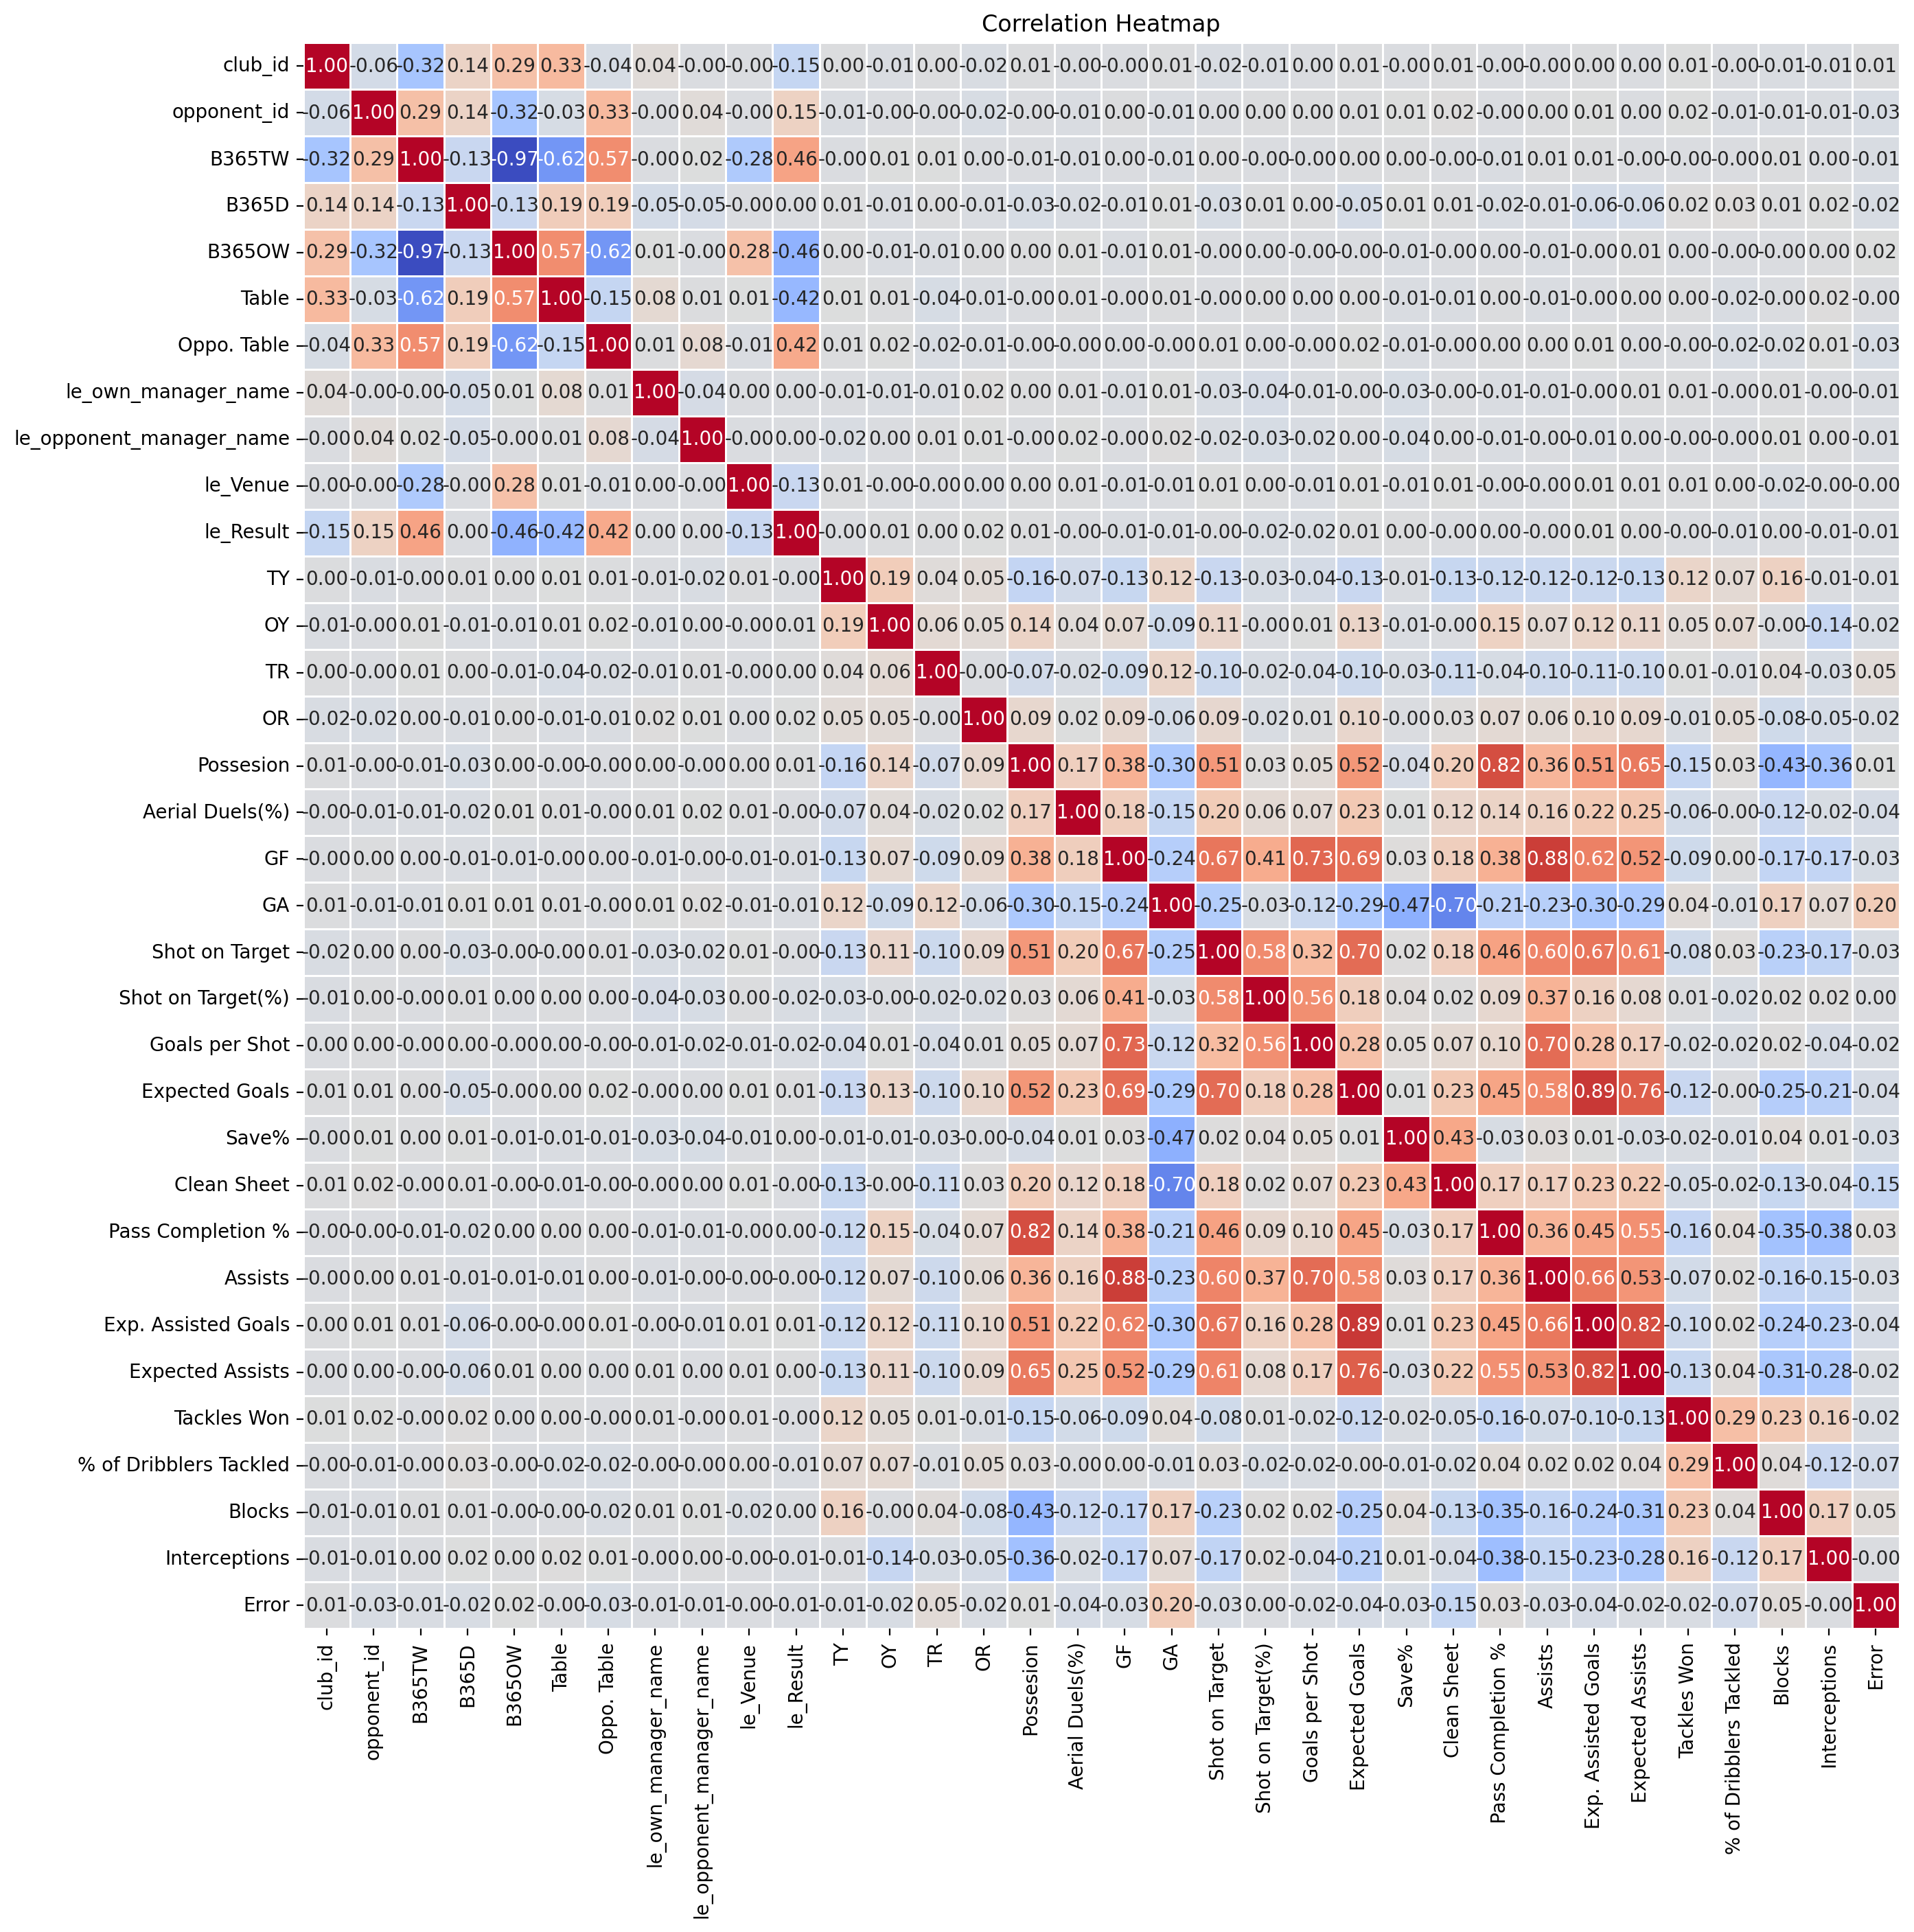

In [89]:
# 상관관계 그래프 그리기
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

In [90]:
cleaned_final_df.columns

Index(['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'le_Venue', 'le_Result', 'TY', 'OY', 'TR', 'OR', 'Possesion',
       'Aerial Duels(%)', 'GF', 'GA', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error'],
      dtype='object')

In [91]:
modeling_features = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'le_Venue', 'TY', 'OY', 'TR', 'OR', 'Possesion',
       'Aerial Duels(%)', 'GF', 'GA', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error']

In [92]:
X = cleaned_final_df[modeling_features]
y = cleaned_final_df['le_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5974477958236659
F1 Score: 0.5535258130704677


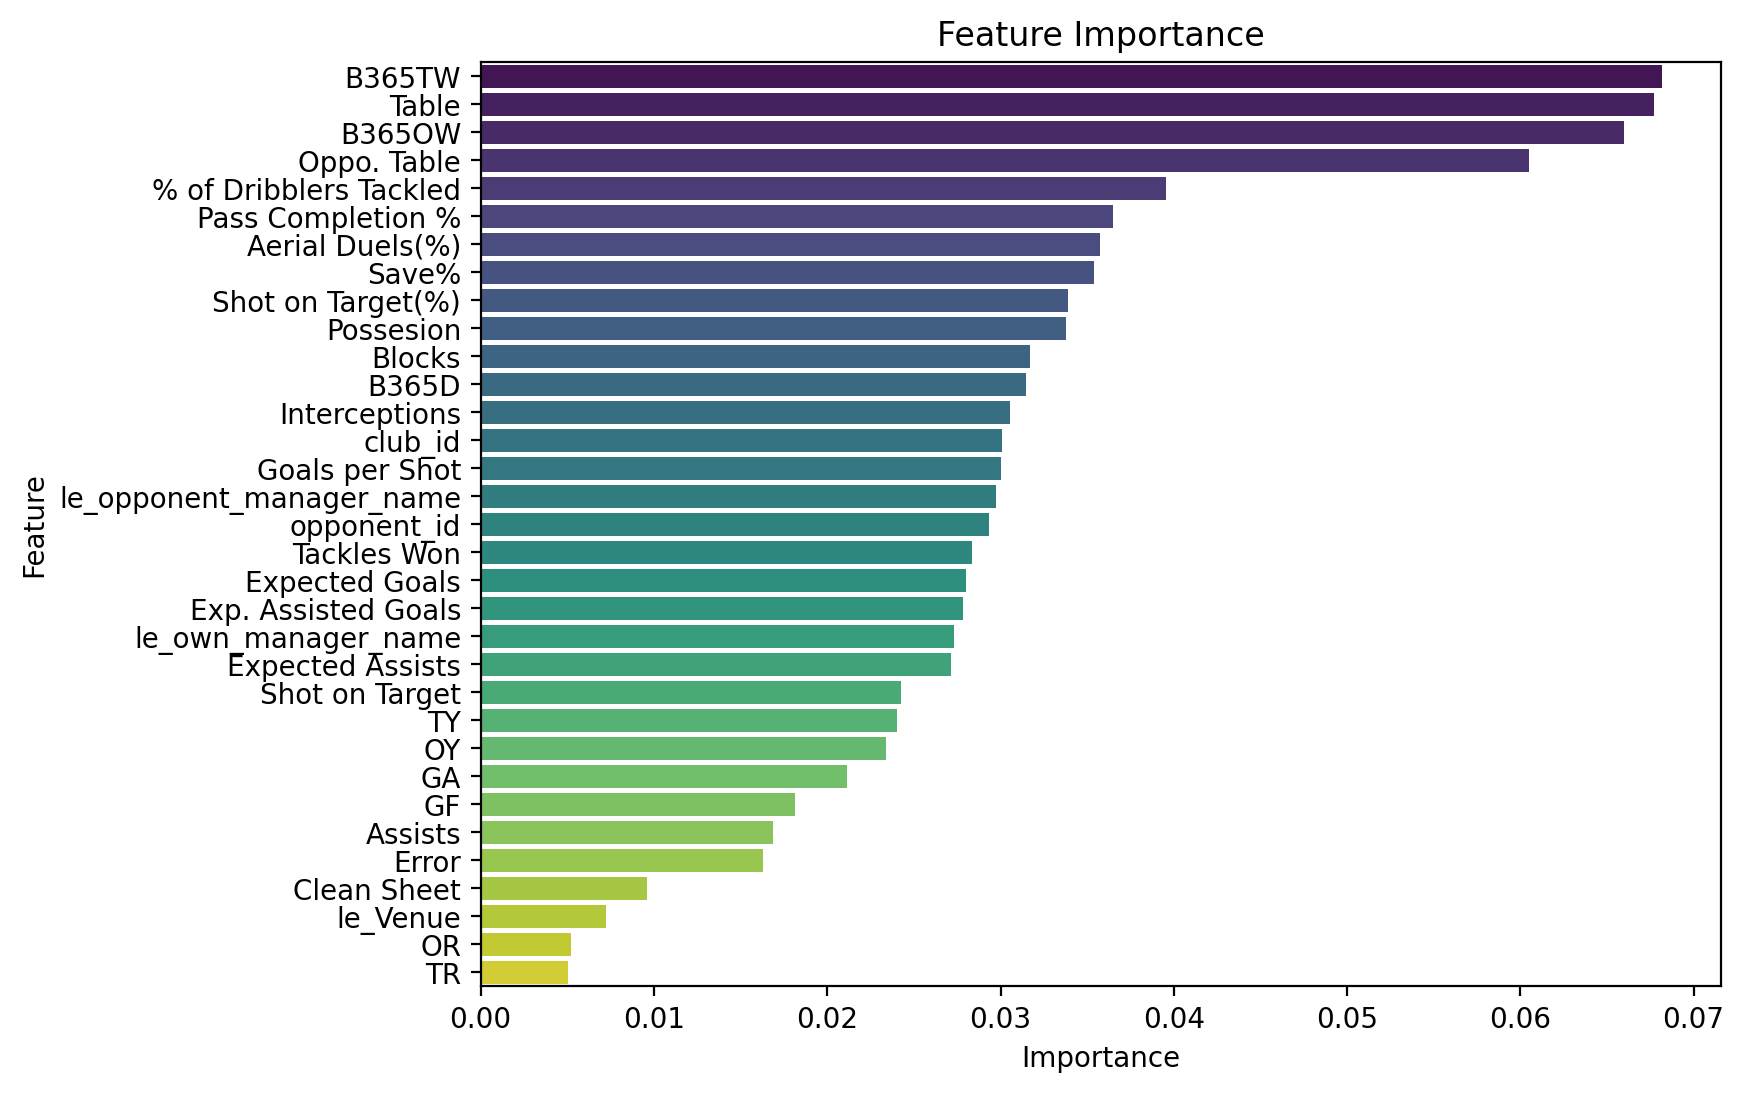

In [94]:
importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [95]:
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5870069605568445
F1 Score: 0.5682490972158807


In [96]:
# feature engineering 밖에 답이 없다...

In [97]:
from sklearn.feature_selection import RFECV

In [98]:
estimator = RandomForestClassifier(n_estimators=100, random_state=42) # 학습시킬 모델 지정
selector = RFECV(estimator, step=1, cv = 5) # 한 step에 제거할 featrue 개수 및 cross validation fold 수 지정
selector = selector.fit(X_train, y_train) # feature selection 진행

In [99]:
### 각 feature의 선별 여부 조회 ###
selector.support_

array([False, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False])

In [100]:
### 선별된 feature들의 목록 조회 ###
selected_columns = X_train.columns[selector.support_]
selected_columns

Index(['B365TW', 'B365OW', 'Table', 'Oppo. Table', 'Aerial Duels(%)',
       'Shot on Target(%)', 'Pass Completion %', '% of Dribblers Tackled'],
      dtype='object')

In [101]:
# 선택된 변수들만 해서 다시 모델링 

In [102]:
rfecv_selected_col = ['B365TW', 'B365OW', 'Table', 'Oppo. Table', 'Aerial Duels(%)',
       'Shot on Target(%)', 'Pass Completion %', '% of Dribblers Tackled']

In [103]:
X = cleaned_final_df[rfecv_selected_col]
y = cleaned_final_df['le_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5974477958236659
F1 Score: 0.571216682870493


In [105]:
rf_model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model2.fit(X_train, y_train)

y_pred = rf_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6032482598607889
F1 Score: 0.5371965976851848


In [106]:
rf_model3 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model3.fit(X_train, y_train)

y_pred = rf_model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6090487238979119
F1 Score: 0.5427828833540881


In [107]:
rf_model4 = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model4.fit(X_train, y_train)

y_pred = rf_model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6020881670533643
F1 Score: 0.5406606844194713


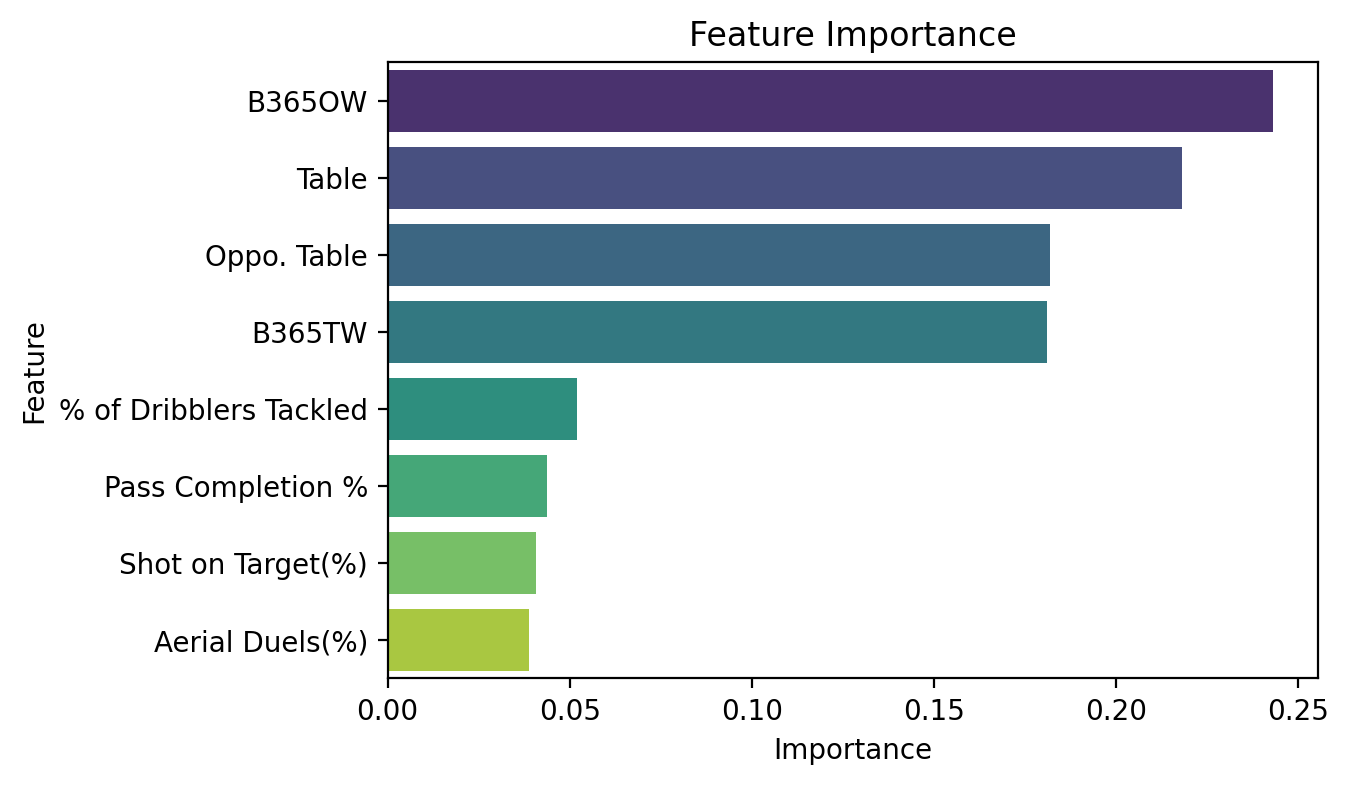

In [108]:
importances = rf_model3.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()